In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns


In [33]:
df = pd.read_csv("data.csv") 
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [34]:
df = df.drop(columns=['id','Unnamed: 32']) 
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [35]:
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})

In [45]:
df.info

<bound method DataFrame.info of      diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0            1        17.99         10.38          122.80     1001.0   
1            1        20.57         17.77          132.90     1326.0   
2            1        19.69         21.25          130.00     1203.0   
3            1        11.42         20.38           77.58      386.1   
4            1        20.29         14.34          135.10     1297.0   
..         ...          ...           ...             ...        ...   
564          1        21.56         22.39          142.00     1479.0   
565          1        20.13         28.25          131.20     1261.0   
566          1        16.60         28.08          108.30      858.1   
567          1        20.60         29.33          140.10     1265.0   
568          0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840    

In [46]:
df.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [47]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [39]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [40]:
df.duplicated().sum()

np.int64(0)

In [41]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [43]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 0.001, 0.01, 0.1, 1]
}

rbf_svm = SVC(kernel='rbf', probability=True)
grid_rbf = GridSearchCV(rbf_svm, param_grid, cv=5, scoring='accuracy')
grid_rbf.fit(X_train_scaled, y_train)


,estimator,SVC(probability=True)
,param_grid,"{'C': [0.1, 1, ...], 'gamma': ['scale', 0.001, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1


In [48]:
best_rbf = grid_rbf.best_estimator_

y_pred_rbf = best_rbf.predict(X_test_scaled)
y_prob_rbf = best_rbf.predict_proba(X_test_scaled)[:,1]

acc_rbf = accuracy_score(y_test, y_pred_rbf)
prec_rbf = precision_score(y_test, y_pred_rbf)
recall_rbf = recall_score(y_test, y_pred_rbf)
f1_rbf = f1_score(y_test, y_pred_rbf)
roc_auc_rbf = roc_auc_score(y_test, y_prob_rbf)
cm_rbf = confusion_matrix(y_test, y_pred_rbf)

In [53]:
print("RBF SVM Results")
print(f"Best Parameters: {grid_rbf.best_params_}")
print(f"Accuracy: {acc_rbf:.4f}")
print(f"Precision: {prec_rbf:.4f}")
print(f"Recall: {recall_rbf:.4f}")
print(f"F1 Score: {f1_rbf:.4f}")
print(f"ROC-AUC: {roc_auc_rbf:.4f}")
print("Confusion Matrix:")
print(cm_rbf)

RBF SVM Results
Best Parameters: {'C': 1, 'gamma': 'scale'}
Accuracy: 0.9737
Precision: 1.0000
Recall: 0.9286
F1 Score: 0.9630
ROC-AUC: 0.9947
Confusion Matrix:
[[72  0]
 [ 3 39]]


In [54]:
linear_svm = SVC(kernel='linear', C=1, probability=True)
linear_svm.fit(X_train_scaled, y_train)

y_pred_lin = linear_svm.predict(X_test_scaled)
y_prob_lin = linear_svm.predict_proba(X_test_scaled)[:,1]

acc_lin = accuracy_score(y_test, y_pred_lin)
prec_lin = precision_score(y_test, y_pred_lin)
recall_lin = recall_score(y_test, y_pred_lin)
f1_lin = f1_score(y_test, y_pred_lin)
roc_auc_lin = roc_auc_score(y_test, y_prob_lin)
cm_lin = confusion_matrix(y_test, y_pred_lin)

In [55]:
print("Linear SVM Results")
print(f"Accuracy: {acc_lin:.4f}")
print(f"Precision: {prec_lin:.4f}")
print(f"Recall: {recall_lin:.4f}")
print(f"F1 Score: {f1_lin:.4f}")
print(f"ROC-AUC: {roc_auc_lin:.4f}")
print("Confusion Matrix:")
print(cm_lin)

Linear SVM Results
Accuracy: 0.9649
Precision: 1.0000
Recall: 0.9048
F1 Score: 0.9500
ROC-AUC: 0.9914
Confusion Matrix:
[[72  0]
 [ 4 38]]


In [56]:
inear_svm = SVC(kernel='linear', C=1, probability=True)
linear_svm.fit(X_train_scaled, y_train)

y_pred_lin = linear_svm.predict(X_test_scaled)
y_prob_lin = linear_svm.predict_proba(X_test_scaled)[:,1]

acc_lin = accuracy_score(y_test, y_pred_lin)
prec_lin = precision_score(y_test, y_pred_lin)
recall_lin = recall_score(y_test, y_pred_lin)
f1_lin = f1_score(y_test, y_pred_lin)
roc_auc_lin = roc_auc_score(y_test, y_prob_lin)
cm_lin = confusion_matrix(y_test, y_pred_lin)

In [57]:
print(" Linear SVM Results")
print(f"Accuracy: {acc_lin:.4f}")
print(f"Precision: {prec_lin:.4f}")
print(f"Recall: {recall_lin:.4f}")
print(f"F1 Score: {f1_lin:.4f}")
print(f"ROC-AUC: {roc_auc_lin:.4f}")
print("Confusion Matrix:")
print(cm_lin)

 Linear SVM Results
Accuracy: 0.9649
Precision: 1.0000
Recall: 0.9048
F1 Score: 0.9500
ROC-AUC: 0.9914
Confusion Matrix:
[[72  0]
 [ 4 38]]


In [60]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:,1]

acc_dt = accuracy_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
roc_auc_dt = roc_auc_score(y_test, y_prob_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)

In [61]:
print("Decision Tree Results")
print(f"Accuracy: {acc_dt:.4f}")
print(f"Precision: {prec_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1 Score: {f1_dt:.4f}")
print(f"ROC-AUC: {roc_auc_dt:.4f}")
print("Confusion Matrix:")
print(cm_dt)

Decision Tree Results
Accuracy: 0.9298
Precision: 0.9048
Recall: 0.9048
F1 Score: 0.9048
ROC-AUC: 0.9246
Confusion Matrix:
[[68  4]
 [ 4 38]]


In [62]:
fpr_rbf, tpr_rbf, _ = roc_curve(y_test, y_prob_rbf)
fpr_lin, tpr_lin, _ = roc_curve(y_test, y_prob_lin)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)

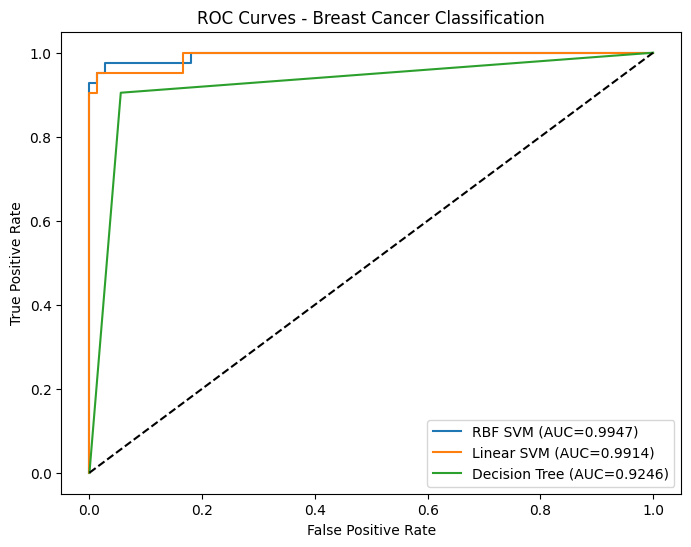

In [64]:
plt.figure(figsize=(8,6))
plt.plot(fpr_rbf, tpr_rbf, label=f'RBF SVM (AUC={roc_auc_rbf:.4f})')
plt.plot(fpr_lin, tpr_lin, label=f'Linear SVM (AUC={roc_auc_lin:.4f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC={roc_auc_dt:.4f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves - Breast Cancer Classification")
plt.legend()